In [169]:
import andes
import os
import matplotlib.pyplot as plt
# import matplotlib 
%matplotlib inline
import numpy as np

# Load case

In [170]:
andes.config_logger(stream_level=20)

# case path
dir_path = os.path.abspath('..')
loc_path_case = '/Base_DC_OPF/case123_REGCV1_v6.xlsx'

case = dir_path + loc_path_case

# load a case
ssa = andes.load(case,
                 setup=True,
                 no_output=True)

Working directory: "/Users/buxinshe/Documents/git-repo/andes/bshe/Base_DC_OPF"
> Loaded config from file "/Users/buxinshe/.andes/andes.rc"
> Reloaded generated Python code of module "pycode".
Parsing input file "/Users/buxinshe/Documents/git-repo/andes/bshe/Base_DC_OPF/case123_REGCV1_v6.xlsx"...
Input file parsed in 0.0707 seconds.
System internal structure set up in 0.0296 seconds.


# Modify case

In [171]:
# upper MD
M1 = np.array([1, 1, 1, 1, 1, 1, 1, 1])*2
D1 = np.array([1, 1, 1, 1, 1, 1, 1, 1])*1

# small MD with small signal issue after gen trip
M2 = np.array([1, 1, 1, 1, 1, 1, 1, 1])
D2 = np.array([1, 1, 1, 1, 1, 1, 1, 1])

# smll MD with transient stability issue after gen trip
M3 = np.array([0.0550819 , 0.05      , 0.05      , 0.18360076, 0.07189779,       0.05      , 0.23838847, 0.2688555 ])
D3 = np.array([0.08507053, 0.16234449, 0.12785225, 0.14253555, 0.29025298,       0.05      , 0.05      , 0.075514  ])

In [172]:
# reset REGCV1 control parameters
ssa.REGCV1.set(
                src='M', 
                idx= ssa.REGCV1.idx.v,
                attr='v',
                value= M1
            )

ssa.REGCV1.set(
                src='D', 
                idx= ssa.REGCV1.idx.v, 
                attr='v',
                value= D1
            )


True

In [173]:
# reset power setting point
ssa.PV.set(
                src='p0', 
                idx= ssa.PV.idx.v, 
                attr='v',
                value= np.array([0.05 , 0.09 , 0.07 , 0.024, 0.014, 0.012, 0.018, 0.015, 0.016, 0.017])
            )

True

In [174]:
# reset load
ssa.PQ.set(
                src='p0', 
                idx= ssa.PQ.idx.v, 
                attr='v',
                value= ssa.PQ.p0.v
            )

True

In [175]:
ssa.PFlow.run()

ssa.TDS.init()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0065 seconds.
0: |F(x)| = 0.65
1: |F(x)| = 0.0002830894939
2: |F(x)| = 1.680238644e-07
Converged in 3 iterations in 0.0367 seconds.
Initialization for dynamics completed in 0.0462 seconds.
Initialization was successful.


array([ 1.06377037e-01,  2.09892926e-01,  7.00956018e-02,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.03730437e+00,  1.00018427e+00,
        1.01286785e+00,  7.74223527e-02,  1.77487186e-01,  5.86934592e-02,
        9.97254650e-01,  9.78939319e-01,  9.98210031e-01,  9.91460797e-02,
        2.13249529e-01,  7.05197532e-02,  5.01718270e-02,  9.01737537e-02,
        2.94106832e-02,  5.01718270e-02,  9.01737537e-02,  2.94106832e-02,
        1.20204498e+00,  1.09098928e+00,  1.07551823e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  2.55226160e-02, -4.66009688e-03,
       -2.12973907e-03,  2.57778422e-01, -4.70669785e-02, -2.15103646e-02,
        1.20204498e+00,  1.09098928e+00,  1.07551823e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.01718270e-02,  9.01737537e-02,
        2.94106832e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.01718270e-02,  9.01737537e-02,  2.94106832e-02,  5.01718270e-02,
        9.01737537e-02,  

In [176]:
ssa.EIG.run()


-> Eigenvalue Analysis:
15 states are associated with zero time constants. 
  Positive       2
  Zeros          9
  Negative     162
Eigenvalue analysis finished in 0.0411 seconds.


True

In [177]:
# ssa.EIG.plot()

In [178]:
# get the maximum eigen value
eig     = ssa.EIG.calc_eig()
eig_max = np.max(eig[0].real)
eig_max

# Note:
# For stable scenario, the maximum eigen value is extracted as positive value, but quite close to zero.
# i.e.,  2.608118165881024e-10
# This is the numerical error, and can be ignored.
# This value is supposed to be zero.

7.683560827397954e-06

In [179]:
# Turn off stability check in TDS
ssa.TDS.config.criteria = 0

# Turn off simulation progress bar
ssa.TDS.config.no_tqdm = 1

# Simulation time
ssa.TDS.config.tf = 20

ssa.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


<Toggle Toggler_1>: GENROU.GENROU_2 status changed to 0 at t=2.0 sec.


Simulation to t=20.00 sec completed in 1.2581 seconds.


True

In [180]:
ssa.EIG.run()

eig_     = ssa.EIG.calc_eig()
eig_max_ = np.max(eig[0].real)
eig_max_



-> Eigenvalue Analysis:
15 states are associated with zero time constants. 
  Positive       2
  Zeros         12
  Negative     162
Eigenvalue analysis finished in 0.0206 seconds.


7.683560827397954e-06

# Plot

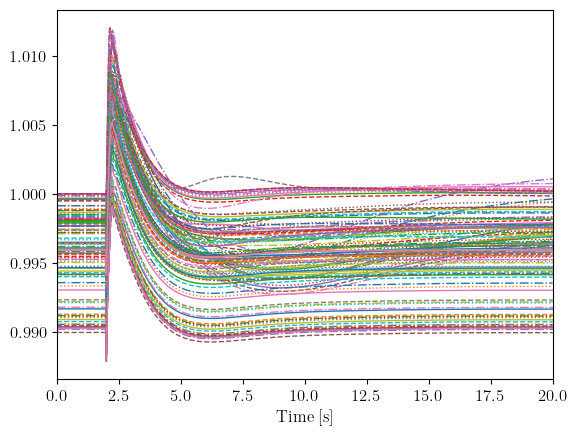

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [181]:
ssa.TDS.plt.plot(
                ssa.Bus.v,
                )

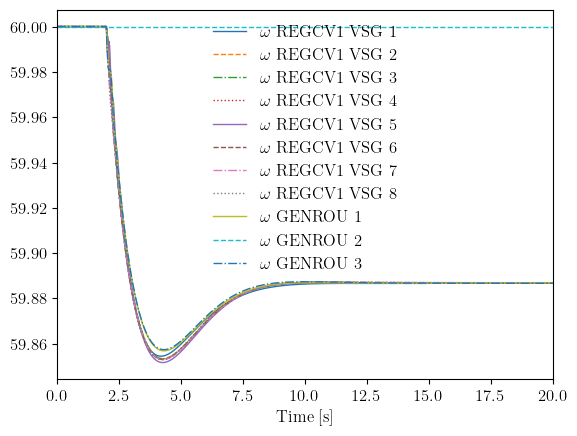

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [182]:
ssa.TDS.plt.plot(
                [ssa.REGCV1.omega, ssa.GENROU.omega],
                ytimes = 60,
                legend = True
                )
                

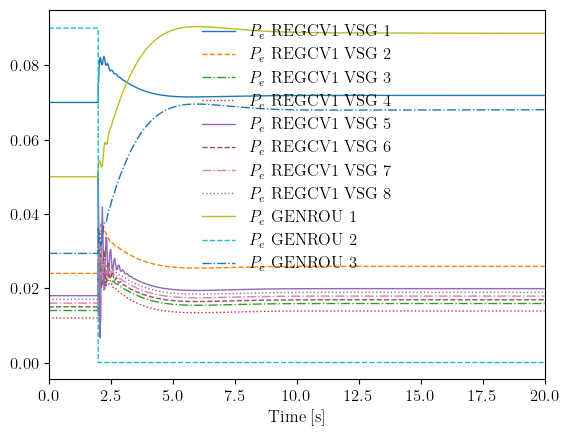

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [183]:
ssa.TDS.plt.plot(
                [ssa.REGCV1.Pe, ssa.GENROU.Pe],
                # left = 0.5,
                # right = 5,
                legend = True
                )

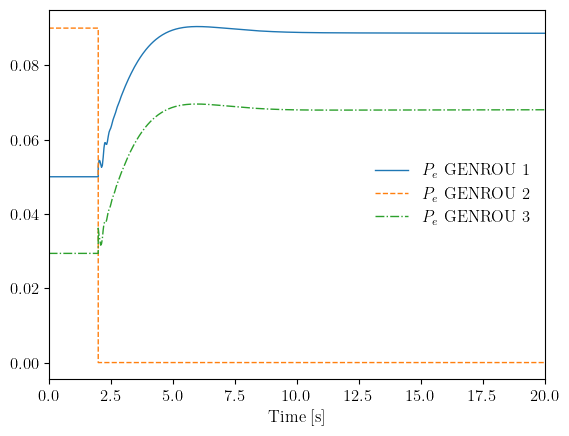

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [184]:
ssa.TDS.plt.plot(
                ssa.GENROU.Pe,
                # left = 0.5,
                # right = 5,
                )

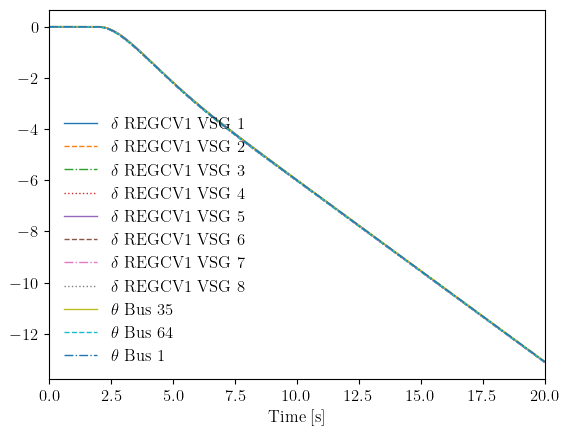

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [185]:
# Power angle
ssa.TDS.plt.plot(
                [ssa.REGCV1.delta, ssa.GENROU.a],   # GENROW angel is bus angle
                legend = True
                )

## Extract data

Code clariffication for extracting simulation data after TDS:

ssa.dae.ts.y:  extract **algebra** variable

ssa.dae.ts.x:  extract **state** variable

....a, .a means the idx of the target variable

CHECK https://docs.andes.app/en/latest/groupdoc/SynGen.html#genrou for model reference


In [186]:
# Extract time
t = ssa.dae.ts.t
t = t[:, np.newaxis]

# Extract RoCoF
rocof     = ssa.dae.ts.y[:,  ssa.BusROCOF.Wf_y.a]
rocof_sg  = rocof[:, [0,1,2]]
rocof_ibr = rocof[:, [3,4,5,6,7,8,9,10]]
rocof_max = np.max(np.abs(rocof*60))

# Extract frequency
f         = ssa.dae.ts.x[:,  ssa.GENROU.omega.a]
fnadir    = np.min(f)*60 - 60

# Extract voltage
busV      = ssa.dae.ts.y[:,  ssa.Bus.v.a]
busV_min  = np.min(busV)

# Extract power angle
theta           = ssa.dae.ts.y[:, ssa.GENROU.a.a]
delta_theta     = np.max(theta, axis=1) - np.min(theta, axis=1)
delta_theta_max = np.max(delta_theta)

## plot RoCoF

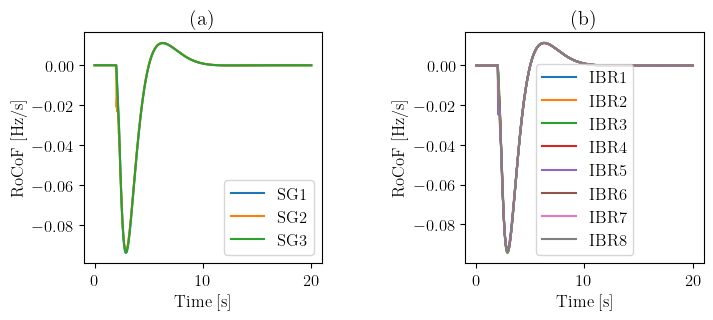

In [187]:
fig = plt.figure(figsize=(8, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.6, hspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ibr_legend = ['IBR1','IBR2','IBR3','IBR4','IBR5','IBR6','IBR7','IBR8']
sg_legend = ['SG1', 'SG2', 'SG3']

ax1.plot(
            t,
            rocof_sg * 60,
        )
ax1.set_title('(a)')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('RoCoF [Hz/s]')
ax1.legend(sg_legend)
# ax1.set_ylim([0.95, 1.12])
# ax1.set_xlim([0, 3600])

ax2.plot(
            t,
            rocof_ibr * 60,
        )
ax2.set_title('(b)')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('RoCoF [Hz/s]')
ax2.legend(ibr_legend)

## Extract data after a specific time

In [188]:

# idx_t6 = np.min(np.where(t>6)[0])                      # find the idx of time t > 6
# f_t6   = ssa.dae.ts.x[idx_t6:,  ssa.GENROU.omega.a]    # extract the frequency after t = 6

# plt.plot(t[idx_t6:], f_t6)                             # plot the frequency after t = 6


# Quick results review

In [189]:

print('Maximum RoCoF: ', rocof_max, 'Hz/s')
print('Frequency nadir: ', fnadir, 'Hz')
print('Maximum angle difference: ', delta_theta_max, 'rad')
print('Minimum voltage: ', busV_min, 'pu')
print('Maximum eigenvalue: ', np.max([eig_max, eig_max_]))


Maximum RoCoF:  0.09428085214995052 Hz/s
Frequency nadir:  -0.14309745686681907 Hz
Maximum angle difference:  0.04366950164970351 rad
Minimum voltage:  0.9877637286802723 pu
Maximum eigenvalue:  7.683560827397954e-06
